In [ ]:
import numpy as np
from spec_id import Highest_likelihood_model_galaxy,Analyze_Stack_avgage_cont_feat_gal_age_correct,Scale_model,Galaxy_ids
import matplotlib.pyplot as plt
from matplotlib import gridspec
from vtl.Readfile import Readfile
from scipy.interpolate import interp1d,interp2d
import seaborn as sea
sea.set(style='white')
sea.set(style='ticks')
sea.set_style({"xtick.direction": "in","ytick.direction": "in"})
colmap = sea.cubehelix_palette(12, start=2, rot=.2, dark=0, light=1.1, as_cmap=True)

In [ ]:
gids=Galaxy_ids('masslist_mar22.dat')

In [ ]:
metal=np.arange(0.002,0.031,0.001)
age=np.arange(.5,6.1,.1)
tau=[0,8.0, 8.3, 8.48, 8.6, 8.7, 8.78, 8.85, 8.9, 8.95, 9.0, 9.04, 9.08, 9.11, 9.15, 9.18, 9.2, 9.23, 9.26, 9.28,
     9.3, 9.32, 9.34, 9.36, 9.38, 9.4, 9.41, 9.43, 9.45, 9.46, 9.48]

In [3]:
wv,fl,er=np.load('spec_stacks_jan24/s39170_stack.npy')

wv,fl,er=np.array([wv[wv<11100],fl[wv<11100],er[wv<11100]])

Pr,bfa,bfm=Analyze_Stack_avgage_cont_feat_gal_age_correct('chidat/s39170_apr6_galfit_cont_chidata.fits',
            'chidat/s39170_apr6_galfit_feat_chidata.fits',1.023,np.array(tau),metal,age)

bfmetal,bfage,bftau=Highest_likelihood_model_galaxy('s39170',1.023,bfm,bfa,tau)

mwv,mfl=np.load('../../../fsps_models_for_fit/galaxy_models/m%s_a%s_t%s_z1.023_s39170_model.npy' % (bfmetal,bfage,bftau))
imfl=interp1d(mwv,mfl)(wv)
C=Scale_model(fl,er,imfl)
imfl*=C

Best fit model is 4.7 Gyr and 0.024 Z


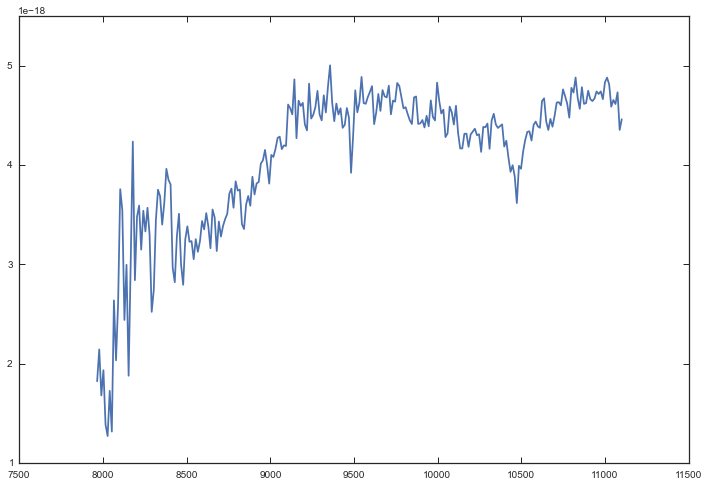

In [9]:
%matplotlib inline

plt.figure(figsize=[12,8])
plt.plot(wv,fl,)
plt.show()
plt.close()

In [ ]:
res=fl-imfl
mu=np.mean(res)
sig=np.std(res)

def Cross_correlate(galaxy,rshift,shift):
    wv,fl,er=np.load('spec_stacks_jan24/%s_stack.npy' % galaxy)

    wv,fl,er=np.array([wv[wv<11100],fl[wv<11100],er[wv<11100]])
    
    Pr,bfa,bfm=Analyze_Stack_avgage_cont_feat_gal_age_correct('chidat/%s_apr6_galfit_cont_chidata.fits' % galaxy,
                'chidat/%s_apr6_galfit_feat_chidata.fits' % galaxy,rshift,np.array(tau),metal,age)
    
    bfmetal,bfage,bftau=Highest_likelihood_model_galaxy(galaxy,rshift,bfm,bfa,tau)
    
    mwv,mfl=np.load('../../../fsps_models_for_fit/galaxy_models/m%s_a%s_t%s_z%s_%s_model.npy' % (bfmetal,bfage,bftau,rshift,galaxy))
    imfl=interp1d(mwv,mfl)(wv)
    C=Scale_model(fl,er,imfl)
    imfl*=C
    res=fl-imfl
    mu=np.mean(res)
    sig=np.std(res)
    
    CC=np.zeros(shift)
    
    for i in range(shift):
    
        if i == 0:
            CC[i]=np.sum((res-mu)*(res-mu))/np.sum(sig*sig)*1/len(wv)
    
        else:
            CC[i]=np.sum((res[i:]-mu)*(res[:-i]-mu))/np.sum(sig*sig)*1/len(wv[i:])
    
    plt.figure(figsize=[12,8])
    plt.plot(range(shift),CC,'-')
    plt.axhline(0,linestyle='--')
    plt.title(galaxy)
    plt.xlabel('Pixels shifted')
    plt.ylabel('Autocorrelation')
    plt.savefig('../autocorrelation_plots/%s_corr.png' % galaxy)
    plt.close()
        
    return CC

Best fit model is 4.7 Gyr and 0.024 Z


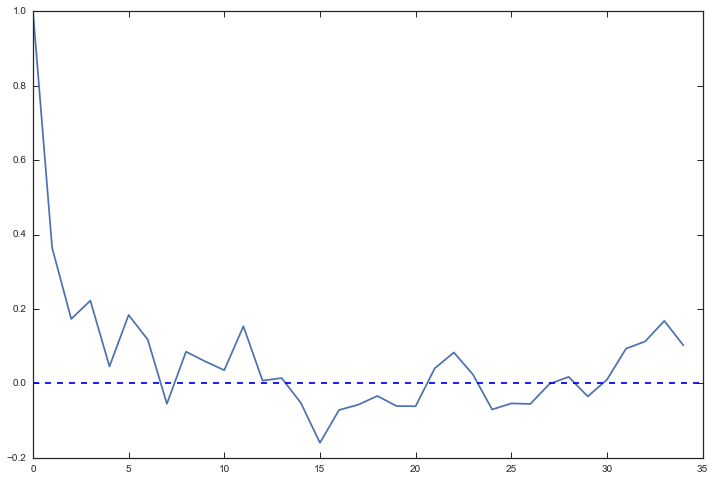

array([ 1.        ,  0.36497646,  0.17336087,  0.22236938,  0.0456431 ,
        0.18382819,  0.11776108, -0.05487246,  0.08523118,  0.05923526,
        0.03548716,  0.15351191,  0.00760259,  0.01420559, -0.05217458,
       -0.15969841, -0.07148191, -0.05738886, -0.03378638, -0.06079177,
       -0.06144662,  0.0404333 ,  0.08318372,  0.02373242, -0.07013364,
       -0.05380459, -0.05525236, -0.0011986 ,  0.01753152, -0.03505061,
        0.00984904,  0.09351293,  0.11278294,  0.16801416,  0.10220309])

In [17]:
Cross_correlate('s39170',1.023,35)

In [25]:
for i in range(len(gids.ids)):
    print gids.ids[i]
    C=Cross_correlate(gids.ids[i],gids.rshift[i],35)

n14713
Best fit model is 3.6 Gyr and 0.03 Z


n16758


Best fit model is 5.2 Gyr and 0.021 Z


n21156


Best fit model is 3.5 Gyr and 0.006 Z


n21427


Best fit model is 4.1 Gyr and 0.03 Z


n23435


Best fit model is 4.1 Gyr and 0.004 Z


n32566


Best fit model is 3.8 Gyr and 0.015 Z


n34694


Best fit model is 2.3 Gyr and 0.024 Z


n37686


Best fit model is 4.4 Gyr and 0.008 Z


s35774


Best fit model is 1.8 Gyr and 0.022 Z


s38785


Best fit model is 4.2 Gyr and 0.004 Z


s39012


Best fit model is 2.7 Gyr and 0.027 Z


s39170


Best fit model is 4.7 Gyr and 0.024 Z


s39241


Best fit model is 4.9 Gyr and 0.018 Z


s39631


Best fit model is 4.7 Gyr and 0.008 Z


s39804


Best fit model is 4.0 Gyr and 0.016 Z


s39805


Best fit model is 3.4 Gyr and 0.03 Z


s40597


Best fit model is 3.4 Gyr and 0.005 Z


s40862


Best fit model is 3.9 Gyr and 0.013 Z


s41520


Best fit model is 1.4 Gyr and 0.015 Z


s42221


Best fit model is 3.9 Gyr and 0.03 Z


s44620


Best fit model is 4.9 Gyr and 0.024 Z


s45972


Best fit model is 4.9 Gyr and 0.003 Z


s46066


Best fit model is 4.1 Gyr and 0.029 Z


s47677


Best fit model is 4.0 Gyr and 0.004 Z


s48631


Best fit model is 3.3 Gyr and 0.015 Z